In [ ]:
## Training our NN model

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train2.csv', date_parser = True )
b = data['b']
h = data['h']
s = data['s']

# hot = np.concatenate(, axis=1)
hot = np.column_stack((b, h, s))
hot[-1]

data = data.dropna()
data = data.reset_index(drop=True)

In [3]:
# history.history['loss']
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

scaler = MinMaxScaler() #read on this from the sklearn - Rich to Rich
data = scaler.fit_transform(data) #scales data to reduce error

game_sizes = [5,25,45,65,85]
losses = []
modelList = []
startIndexList = []
for game_size in game_sizes:
    X_train = []
    y_train = []
    for games in range(25):
        starting_index = random.randint(0,len(data)-2*game_size-1)
        play_range_data = data[starting_index:starting_index+game_size]
        startIndexList.append(starting_index)
        X_train = list(X_train)
        y_train = list(y_train)
        for i in range(2, play_range_data.shape[0]):
            X_train.append(play_range_data[i-2:i])
            y_train.append(play_range_data[i,[7,8,9]])
            
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    regressor = Sequential()

    regressor.add(LSTM(units = 50, activation = 'tanh', return_sequences = True, input_shape = (X_train.shape[1], 10)))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 50, activation = 'tanh', return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 100, activation = 'tanh'))
    regressor.add(Dropout(0.2))

    regressor.add(Dense(units = 3))

    regressor.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['accuracy']) #find a different loss function for classification
    history = regressor.fit(X_train, y_train, epochs=100, batch_size=game_size)
#     plt.plot(history.history['loss'], label = str(game_size))
    losses.append(history.history['loss'])
    modelList.append(regressor)
    
    
    
# plt.ylabel('Loss')
# plt.title('Loss for Each Game Size')
# plt.xlabel('Epochs')
# plt.legend(loc='best')

# # plt.show()

# plt.xlim(20,100)

# # plt.show()

# plt.plot()

Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 0.2930 - accuracy: 0.9067
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1344 - accuracy: 0.9200
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0553 - accuracy: 0.9200
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0484 - accuracy: 0.9200
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0452 - accuracy: 0.9200
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0433 - accuracy: 0.9200
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0411 - accuracy: 0.9200
Epoch 8/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0418 - accuracy: 0.9200
Epoch 9/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0409 - accuracy: 0.9200
Epoch 10/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0405 - accuracy: 0.9200
Epoch 11/

15/15 [==============================] - 0s 6ms/step - loss: 0.0259 - accuracy: 0.9600
Epoch 84/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9600
Epoch 85/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9467
Epoch 86/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0226 - accuracy: 0.9600
Epoch 87/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9600
Epoch 88/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 0.9600
Epoch 89/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0267 - accuracy: 0.9600
Epoch 90/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0260 - accuracy: 0.9600
Epoch 91/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0288 - accuracy: 0.9600
Epoch 92/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0250 - accuracy: 0.9600
Epoch 93/100


24/24 [==============================] - 0s 11ms/step - loss: 0.0301 - accuracy: 0.9526
Epoch 46/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0309 - accuracy: 0.9535
Epoch 47/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0304 - accuracy: 0.9526
Epoch 48/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0306 - accuracy: 0.9544
Epoch 49/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0310 - accuracy: 0.9535
Epoch 50/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0298 - accuracy: 0.9544
Epoch 51/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0293 - accuracy: 0.9544
Epoch 52/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0302 - accuracy: 0.9544
Epoch 53/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0310 - accuracy: 0.9544
Epoch 54/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0297 - accuracy: 0.9535
Epoch 55/

25/25 [==============================] - 0s 11ms/step - loss: 0.0282 - accuracy: 0.9571
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0278 - accuracy: 0.9571 0s - loss: 0.0226 - accuracy
Epoch 7/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0278 - accuracy: 0.9571
Epoch 8/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0277 - accuracy: 0.9571
Epoch 9/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0274 - accuracy: 0.9571
Epoch 10/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0272 - accuracy: 0.9571
Epoch 11/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0268 - accuracy: 0.9571
Epoch 12/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0264 - accuracy: 0.9571
Epoch 13/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0264 - accuracy: 0.9571
Epoch 14/100
25/25 [==============================] - 0s 11ms/step - loss: 0.02

Epoch 85/100
25/25 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.97 - 0s 12ms/step - loss: 0.0202 - accuracy: 0.9701
Epoch 86/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0200 - accuracy: 0.9701
Epoch 87/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0205 - accuracy: 0.9701
Epoch 88/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0203 - accuracy: 0.9701
Epoch 89/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0201 - accuracy: 0.9701
Epoch 90/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0206 - accuracy: 0.9701
Epoch 91/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0203 - accuracy: 0.9701
Epoch 92/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0204 - accuracy: 0.9701
Epoch 93/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0203 - accuracy: 0.9701
Epoch 94/100
25/25 [=============================

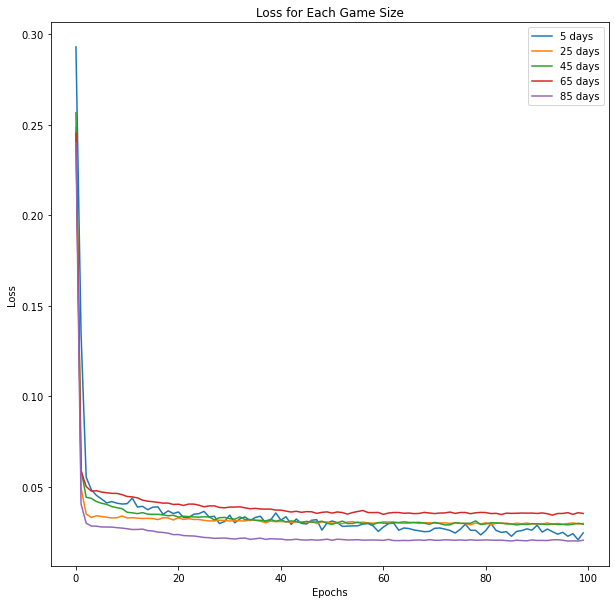

In [6]:
plt.figure(figsize=(10, 10))
for loss,size in zip(losses,game_sizes):
    plt.plot(loss,label= str(size) +' days')
plt.ylabel('Loss')
plt.title('Loss for Each Game Size')
plt.xlabel('Epochs')
plt.legend(loc='best')
plt.savefig('Loss.png',dpi=300, bbox_inches='tight')
plt.show()

In [46]:
# plt.figure(figsize=(10, 10))
# for loss,size in zip(losses,game_sizes):
#     plt.plot(loss,label=size)
# plt.ylabel('Loss')
# plt.title('Loss for Each Game Size')
# plt.xlabel('Epochs')
# plt.legend(loc='best')

# plt.xlim(0,20)

# plt.show()

# # put in report of compounding accuracy i.e. 0.98*0.98 etc.

In [45]:
# plt.figure(figsize=(10, 10))
# for loss,size in zip(losses,game_sizes):
#     plt.plot(loss,label=size)
# plt.ylabel('Loss')
# plt.title('Loss for Each Game Size')
# plt.xlabel('Epochs')
# plt.legend(loc='best')


# plt.xlim(20,100)
# plt.ylim(0,0.04)


# # plt.show()

In [7]:
# The x-axis should be actual NN output, and the y-axis should be target NN output.  
# So you should have 5 scatter plots, one per problem instance.
# plotting for training data

game_sizes = [5,25,45,65,85]
yPredList = []
yTestList = []

for game_size, regressor,startIndex in zip(game_sizes,modelList,startIndexList):
    X_train = []
    y_train = []
    #for games in range(25):
    #starting_index = data.shape[0] - game_size - 1
    play_range_data = data[startIndex-2:startIndex+game_size]
    X_train = list(X_train)
    y_train = list(y_train)
    for i in range(2, play_range_data.shape[0]):
        X_train.append(play_range_data[i-2:i])
        y_train.append(play_range_data[i,[7,8,9]])
       
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_pred = regressor.predict(X_train)
    
    for i in range(y_pred.shape[0]):
    #print(i,y_pred[i])
        k = (np.argmax(y_pred[i]))
        y_pred[i] = [0,0,0]
        y_pred[i][k] = 1
    
    yPredList.append(y_pred)
    yTestList.append(y_train)  
    count = 0
    for i in range(y_pred.shape[0]):
        if np.array_equal(y_pred[i],y_train[i]):
            pass
        else:
            count+=1
    print("No of Times where our model predicted wrong output",count) 


No of Times where our model predicted wrong output 3
No of Times where our model predicted wrong output 4
No of Times where our model predicted wrong output 2
No of Times where our model predicted wrong output 4
No of Times where our model predicted wrong output 2


In [8]:
def oneHotToAction(outputs):
    actionsList = []
    for i in outputs:
        #print(i)
        actions = []
        for j in i:
            #print(j)
            k = (np.argmax(j))
            if k == 0 :
                act = 'b'
            if k == 1:
                act = 'h'
            else:
                act = 's'
            actions.append(act)
        actionsList.append(actions)
    return actionsList

In [9]:
actionsListPredicted = oneHotToAction(yPredList)
actionsListActual = oneHotToAction(yTestList) 

5 5
['s', 'h', 'h', 'h', 's'] ['h', 's', 'h', 'h', 'h']
{'BUY': 0, 'HOLD': 3, 'SELL': 2} {'BUY': 0, 'HOLD': 4, 'SELL': 1}


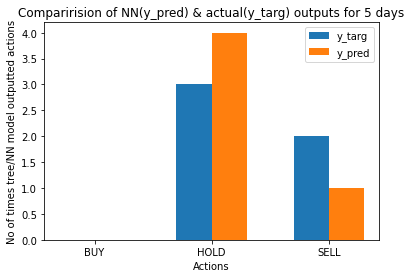

25 25
['h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 's', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']
{'BUY': 0, 'HOLD': 21, 'SELL': 4} {'BUY': 0, 'HOLD': 25, 'SELL': 0}


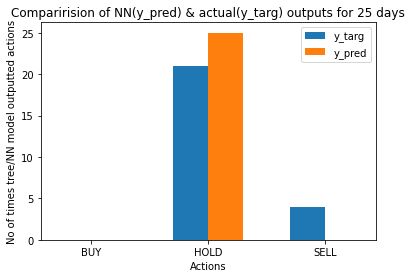

45 45
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']
{'BUY': 0, 'HOLD': 43, 'SELL': 2} {'BUY': 0, 'HOLD': 45, 'SELL': 0}


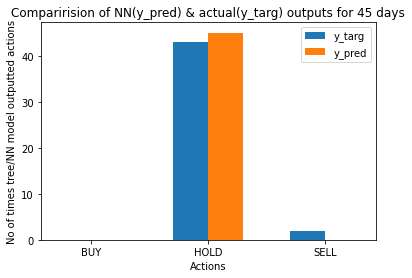

65 65
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']
{'BUY': 0, 'HOLD': 61, 'SELL': 4} {'BUY': 0, 'HOLD': 65, 'SELL': 0}


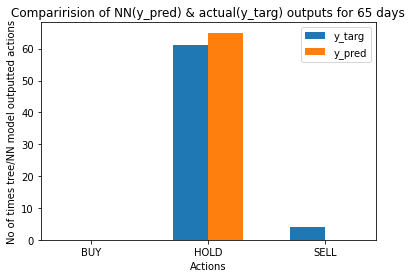

85 85
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']
{'BUY': 0, 'HOLD': 83, 'SELL': 2} {'BUY': 0, 'HOLD': 85, 'SELL': 0}


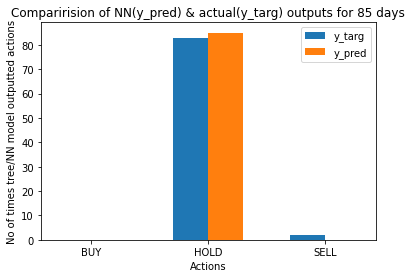

In [10]:
dictActual = {'BUY':0,'HOLD':0, 'SELL':0}
dictPred = {'BUY':0,'HOLD':0, 'SELL':0}
k = 5
for i,size in zip(range(len(yTestList)),game_sizes):
    #print(actionsListPredicted[i], actionsListActual[i])
    x = actionsListActual[i]
    y = actionsListPredicted[i]
    dictActual['BUY'] = x.count('b')
    dictActual['HOLD'] = x.count('h')
    dictActual['SELL'] = x.count('s')
    dictPred['BUY'] = y.count('b')
    dictPred['HOLD'] = y.count('h')
    dictPred['SELL'] = y.count('s')
    
    actualList = list(dictActual.values())
    predList = list(dictPred.values())
    
    print(len(x),len(y))
    print(x,y)
    print(dictActual, dictPred)
#     plt.bar(*zip(*dictActual.items()))
#     plt.bar(*zip(*dictPred.items()))
#     plt.show()
    
    N = 3
    
    ind = np.arange(N)
    
    # Width of a bar 
    width = 0.3       

    # Plotting
    plt.bar(ind, actualList, width, label='y_targ')
    plt.bar(ind + width, predList, width, label='y_pred')

    plt.xlabel('Actions')
    plt.ylabel('No of times tree/NN model outputted actions')
    plt.title('Comparirision of NN(y_pred) & actual(y_targ) outputs for %i days' %size)

    plt.xticks(ind + width / 2, ('BUY', 'HOLD', 'SELL'))

    # Finding the best position for legends and putting it
    plt.legend(loc='best')
    plt.savefig('Compare%02d.png'%(k),dpi=300, bbox_inches='tight')
    k+=20
    plt.show()
    

    # plt.ylabel('Actions')
    # plt.title('')
    # plt.xlabel('Days')
    # plt.legend(loc='best')

In [ ]:
## TESTING OUR 5 TRAINED MODELS WITH TEST DATA

In [12]:

game_sizes = [5,25,45,65,85]
yPredList = []
yTestList = []

for game_size, regressor in zip(game_sizes,modelList):
    X_test = []
    y_test = []
    #for games in range(25):
    starting_index = data.shape[0] - game_size - 1
    play_range_data = data[starting_index-2:starting_index+game_size]
    X_test = list(X_test)
    y_test = list(y_test)
    for i in range(2, play_range_data.shape[0]):
        X_test.append(play_range_data[i-2:i])
        y_test.append(play_range_data[i,[7,8,9]])
       
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_pred = regressor.predict(X_test)
    
    for i in range(y_pred.shape[0]):
    #print(i,y_pred[i])
        k = (np.argmax(y_pred[i]))
        y_pred[i] = [0,0,0]
        y_pred[i][k] = 1
    
    yPredList.append(y_pred)
    yTestList.append(y_test)  
    count = 0
    for i in range(y_pred.shape[0]):
        if np.array_equal(y_pred[i],y_test[i]):
            pass
        else:
            count+=1
    print("No of Times where our model predicted wrong output",count)    
    


No of Times where our model predicted wrong output 1
No of Times where our model predicted wrong output 1
No of Times where our model predicted wrong output 1
No of Times where our model predicted wrong output 3
No of Times where our model predicted wrong output 4


In [13]:
modelList

In [14]:
yPredList

[array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]

In [15]:
yTestList

[array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
      

In [16]:
actionsListPredicted = oneHotToAction(yPredList)
actionsListActual = oneHotToAction(yTestList) 

In [17]:
for i in range(len(yTestList)):
    print(actionsListPredicted[i], actionsListActual[i])

['h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 's']
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's']
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's']
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'

In [18]:
import simulation_nn_tree as t
import player as p 

In [19]:


if __name__ == "__main__":
 
    game_len_results = []
    nodes_processed_list = []
    random_cash_list = []
    game_len_results_basic = []
    nodes_processed_list_basic = []
  
    game_sizes = [5,25,45,65,85]

    
#     for i in range(100):
#         random_cash_list.append(random.randint(5000,15000)) # Generating 100 random cash values for 100 simulations with 5 game sizes 
#     random_cash_list.sort()

    random_cash_list = [5002, 5071, 5232, 5235, 5389, 5439, 5514, 5628, 5765, 5894, 5953, 5984, 6112, 6152, 6159, 
                        6314, 6320, 6376, 6429, 6694, 6752, 6821, 6879, 6927, 7120, 7179, 7270, 7278, 7621, 7694, 
                        7710, 7711, 7723, 7748, 7792, 7849, 7856, 7893, 7905, 8000, 8046, 8476, 8592, 8636, 8820, 
                        8913, 9058, 9084, 9160, 9419, 9499, 9666, 9683, 10140, 10145, 10203, 10366, 10450, 10473, 
                        10481, 10522, 10680, 10684, 10697, 10776, 11012, 11064, 11207, 11213, 11396, 11478, 11747, 
                        11823, 12043, 12217, 12420, 12446, 12517, 12716, 12961, 13055, 13401, 13402, 13406, 13413, 
                        13416, 13452, 13472, 13488, 13675, 13741, 14006, 14036, 14081, 14193, 14245, 14548, 14616, 
                        14948, 14987]

    ## Beam Search AI
    for game_len, actions in zip(game_sizes, actionsListPredicted) :
        print("Game Length:",game_len)
        result_list = []
        nodes_count_list = []
        print('--------------------------------------------')
        print(game_len)
        print('--------------------------------------------')
        for cash in random_cash_list:
            print("starting with cash:",cash)
            player_obj = p.Player('AAPL', cash, {'AAPL': 0})
            node = t.Node(player=player_obj)
            result = t.beam_search(node, 4, game_len, actions)
            final_result = result[0]
            nodes_processed = result[1]
            result_list.append(final_result)
            nodes_count_list.append(nodes_processed)
            
        game_len_results.append(result_list)
        nodes_processed_list.append(nodes_count_list)
 
    #print(game_len_results)
    #print(nodes_processed_list)


    


Game Length: 5
--------------------------------------------
5
--------------------------------------------
starting with cash: 5002
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 4774.179992
Portfolio {'AAPL': 2}
Last day Open Price 115.279999
Total Cash Value 5004.73999
Total Nodes Processed 45
Wow! our AI made profit of:2.7399900000000343

starting with cash: 5071
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
A

No of nodes Processed:  12
Actions AI chose: ['b']
Cash 6201.179992
Portfolio {'AAPL': 2}
Last day Open Price 115.279999
Total Cash Value 6431.73999
Total Nodes Processed 45
Wow! our AI made profit of:2.7399900000000343

starting with cash: 6694
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 6466.179992
Portfolio {'AAPL': 2}
Last day Open Price 115.279999
Total Cash Value 6696.73999
Total Nodes Processed 45
Wow! our AI made profit of:2.7399900000000343

starting with cash: 6752
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h'

level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 7563.269988
Portfolio {'AAPL': 3}
Last day Open Price 115.279999
Total Cash Value 7909.109985
Total Nodes Processed 45
Wow! our AI made profit of:4.1099850000000515

starting with cash: 8000
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 7658.269988
Portfolio {'AAPL': 3}
Last day Open Price 115.279999
Total Cash Value 8004.109985
Total Nodes Processed 45
Wow! our AI made profit of:4.1099850000000515

starting with cash: 8046
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b

Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 10017.359984
Portfolio {'AAPL': 4}
Last day Open Price 115.279999
Total Cash Value 10478.47998
Total Nodes Processed 45
Wow! our AI made profit of:5.479980000000069

starting with cash: 10481
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 10025.359984
Portfolio {'AAPL': 4}
Last day Open Price 115.279999
Total Cash Value 10486.47998
Total Nodes Processed 45
Wow! our AI made profit of:5.479980000000069

starting with cash: 10522
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes 

level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 12485.44998
Portfolio {'AAPL': 5}
Last day Open Price 115.279999
Total Cash Value 13061.849975
Total Nodes Processed 45
Wow! our AI made profit of:6.849974999999176

starting with cash: 13401
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 12831.44998
Portfolio {'AAPL': 5}
Last day Open Price 115.279999
Total Cash Value 13407.849975
Total Nodes Processed 45
Wow! our AI made profit of:6.849974999999176

starting with cash: 13402
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  

level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 4016.979980000001
Portfolio {'AAPL': 12}
Last day Open Price 115.279999
Total Cash Value 5400.339968000001
Total Nodes Processed 285
Wow! our AI made profit of:11.339968000001136

starting with cash: 5439
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b

level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No o

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes P

level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 5056.979980000001
Portfolio {'AAPL': 12}
Last day Open Price 115.279999
Total Cash Value 6440.339968000001
Total Nodes Processed 285
Wow! our AI made profit of:11.339968000001136

starting with cash: 6694
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h'

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  

Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Proces

level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 5941.96997
Portfolio {

level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 6577.969969999999
Portfolio {'AAPL': 18}
Last day Open Price 115.279999
Total Cash Value 8653.009952
Total Nodes Processed 285
Wow! our AI made profit of:17.00995200000034

s

level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of no

level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of 

level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 7777.959960000002
Portfolio {'AAPL': 24}
Last day Open Price 115.279999
Total Cash Value 10544.679936000002
Total Nodes Processed 285
Wow! our AI made profit of:22.6799360000

level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 8031.959960000002
Portfolio {'AAPL': 24}
Last day Open Price 115.279999
Total Cash Value 10798.679936000002
Total Nodes Processed 285
Wow! our AI made profit of:22.67993600000227

starting with cash: 11012
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b'

Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 8278.819952999998
Portfolio {'AAPL': 28}
Last day Open Price 115.279999
Total Cash Value 11506.659924999998
Total Nodes Processed 285
Wow! our AI made profit of:28.65992499999811

starting with cash: 11747
level

level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 9015.949949999998
Portfolio {'AAPL': 30}
Last day Open Price 115.279999
Total Cash Value 12474.349919999999
Total Nodes Processed 285
Wow! our AI made profit of:28.3499199999

level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 9970.949949999998
Portfolio {'AAPL': 30}
Last day Open Price 115.279999
Total Cash Value 13429.349919999999
Total Nodes Processed 285
Wow! our AI made profit of:28.349919999998747

starting with cash: 13402
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b'

level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No

level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 9889.93994
Portfolio {'AAPL': 36}
Last day Open Price 115.279999
Total Cash Value 14040.019904
Total Nodes Processed 285
Wow! our AI made profit of:34.01990400000068

starting with cash: 14036
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h'

level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 10431.93994
Portfolio {'AAPL': 36}
Last day Open Price 115.279999
Total Cash Value 14582.019904
Total Nodes Processed 285
Wow! our AI made profit of:34.01990400000068

starting with cash: 14616
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
l

level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No

level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 2282.789962
Portfolio {'AAPL': 26}
Last day Open Price 115.279999
Total Cash Value 5280.069936
Total Nodes Processed 525
Wow! our AI made profit of:48.06993599999987

starting with cash: 5235
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
lev

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes 

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 2678.789961999999
Portfolio {'AAPL': 26}
Last day Open Price 115.279999
Total Cash Value 5676.069935999999
Total Nodes Processed 525
Wow! our AI made profit of:48.06993599999896

starting with cash: 5765
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']

level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: [

Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b']
Cash 3155.654951999999
Portfolio {'AAPL': 33}
Last day Open Price 115.279999
Total Cash Value 6959.8949189999985
Total Nodes Processed 525
Wow! our AI made profit of:80.89491899999848

starting with cash: 6927
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
l

level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No

Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI c

level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes 

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 3324.184943
Portfolio {'AAPL': 39}
Last day Open Price 115.279999
Total Cash Value 7820.104904000001
Total Nodes Processed 525
Wow! our AI made profit of:72.10490400000072

starting with cash: 7792
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes 

level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Proces

level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes 

level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 3962.0499329999984
Portfolio {'AAPL': 46}
Last day Open Price 115.279999
Total Cash Value 9264.929886999998
Total Nodes Processed 525
Wow! our AI made profit of:104.92988699999842

starting with cash: 9419
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', '

level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No

level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 4241.579924
Portfolio {'AAPL': 52}
Last day Open Price 115.279999
Total Cash Value 10236.139872
Total Nodes Processed 525
Wow! our AI made profit of:96.13987199999974

starting with cash: 10145
level: 0
No of nodes Processed:  3
Actions AI chose: ['b

level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No

level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Proce

level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of node

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 4766.329915999999
Portfolio {'AAPL': 57}
Last day Open Price 115.279999
Total Cash Value 11337.289858999999
Total Nodes Processed 525
Wow! our AI made profit of:124.28985899999861

starting with cash: 11396
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h',

level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 4612.664907999999
Portfolio {'AAPL': 63}
Last day Open Price 115.279999
Total Cash Value 11875.304844999999
Total Nodes Processed 525
Wow! our AI made profit of:128.30484499999875

starting with cash: 11823
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b

level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No

level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 5072.974905000001
Portfolio {'AAPL': 65}
Last day Open Price 115.279999
Total Cash Value 12566.174840000001
Total Nodes Processed 525
Wow! our AI made profit of:120.174840000

level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No

level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No

level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No

level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 5550.724897000002
Portfolio {'AAPL': 70}
Last day Open Price 115.279999
Total Cash Value 13620.324827000002
Total Nodes Processed 525
Wow! our AI made profit of:148.3248270000022

starting with cash: 13488
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', '

Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI c

level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose

level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 5995.829885
Portfolio {'AAPL': 79}
Last day Open Price 115.279999
Total Cash Value 15102.949806
Total Nodes Processed 525
Wow! our AI made profit of:154.94980600000054

starting with cash: 14987
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h',

level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes 

level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No

level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes 

Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI c

level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No

level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No

level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No

Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI c

level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes 

level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No

level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI c

level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No

level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No

level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No

level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of node

level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1282.0850380000002
Portfolio {'AAPL': 60}
Last day Open Price 115.279999
Total Cash Value 8198.884978
Total Nodes Processed 765
Wow! our AI made profit of:293.88497800000005

starting with cash: 8000
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h',

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  

Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI c

level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes 

level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No

level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No

level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes 

level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No

level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No

level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1945.1675500000015
Portfolio {'AAPL': 79}
Last day Open Price 115.279999
Total Cash Value 11052.287471000001
Total Nodes Processed 765
Wow! our AI made profit of:372.28747100000146

starting with cash: 10684
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b'

Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI c

level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No

level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No

level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes 

level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1324.9475569999977
Portfolio {'AAPL': 97}
Last day Open Price 115.279999
Total Cash Value 12507.107459999997
Total Nodes Processed 765
Wow! our AI made profit of:464.10745999999745

starting with cash: 12217
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b',

level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI c

level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of 

level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No

level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No

level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1655.7000669999984
Portfolio {'A

level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No

level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No

level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Proc

level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No

level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1151.4625120000005
Portfolio {'AAPL': 41}
Last day Open Price 115.279999
Total Cash Value 5877.942471
Total Nodes Processed 1005
Wow! our AI made profit of:875.9424710000003

starting with cash: 5071
level: 0
No of nodes Processed:  3
Actions AI chos

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes 

level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No

Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI c

level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1397.2950090000013
Portfolio {'AAPL': 44}
Last day Open Price 115.279999
Total Cash Value 6469.614965000002
Total Nodes Processed 1005
Wow! our AI made profit of:955.6149650000016

starting with cash: 5628
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', '

level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 441.32501700000006
Portfolio {'AAPL': 58}
Last day Open Price 115.279999
Total Cash Value 7127.564959
Total Nodes Processed 1005
Wow! our AI made profit of:1233.5649590000003

starting with cash: 5953
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
le

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes 

level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes 

level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No

level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1017.8500180000001
Portfolio {'AAPL': 61}
Last day Open Price 115.279999
Total Cash Value 8049.929957
Total Nodes Processed 1005
Wow! our AI made profit of:1297.9299570000003

starting with cash: 6821
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
leve

level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  

level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No

level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No

level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1057.2325189999995
Portfolio {'AAPL': 70}
Last day Open Price 115.279999
Total Cash Value 9126.832449
Total Nodes Processed 1005
Wow! our AI made profit of:1505.8324489999995

starting with cash: 7694
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b'

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes 

level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of n

level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  

Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI c

level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No

level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 858.2375239999997
Portfolio {'AAPL': 81}
Last day Open Price 115.279999
Total Cash Value 10195.917443
Total Nodes Processed 1005
Wow! our AI made profit of:1719.9174430000003

starting with cash: 8592
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h

level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI c

Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1265.0575239999996
Portfolio {'AAPL': 83}
Last day Open Pri

Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI c

Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: 

Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI c

Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI c

Actions AI chose: ['b']
Cash 643.6250299999979
Portfolio {'AAPL': 101}
Last day Open Price 115.279999
Total Cash Value 12286.904928999998
Total Nodes Processed 1005
Wow! our AI made profit of:2141.9049289999984

starting with cash: 10203
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Pr

level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI c

level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No

level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1003.445029999999
Portfolio {'AAPL': 103}
Last day Open Price 115.279999
Total Cash Value 12877.284926999999
Total Nodes Processed 1005
Wow! our AI made profit of:2197.284926999999

starting with cash: 10684
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: [

Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI c

level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes 

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  

level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No

Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI c

Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes 

level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 956.8325359999998
Portfolio {'AAPL': 123}
Last day Open Price 115.279999
Total Cash Value 15136.27

Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI c

level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes 

Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI c

Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h'

level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes 

level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes 

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes 

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes 

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes 

level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of no

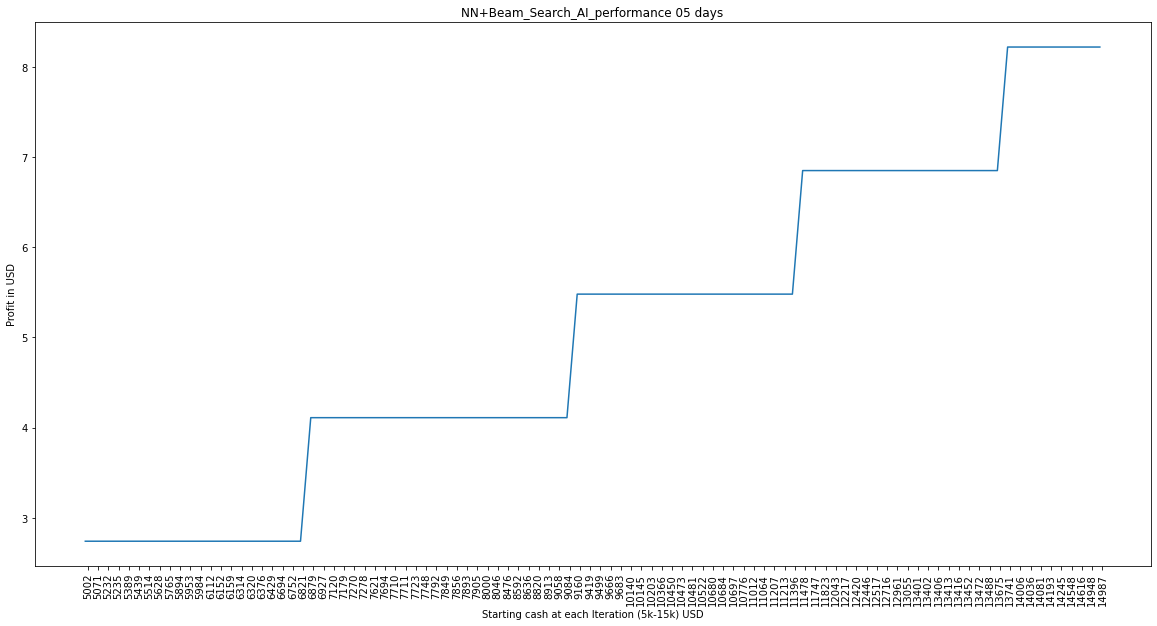

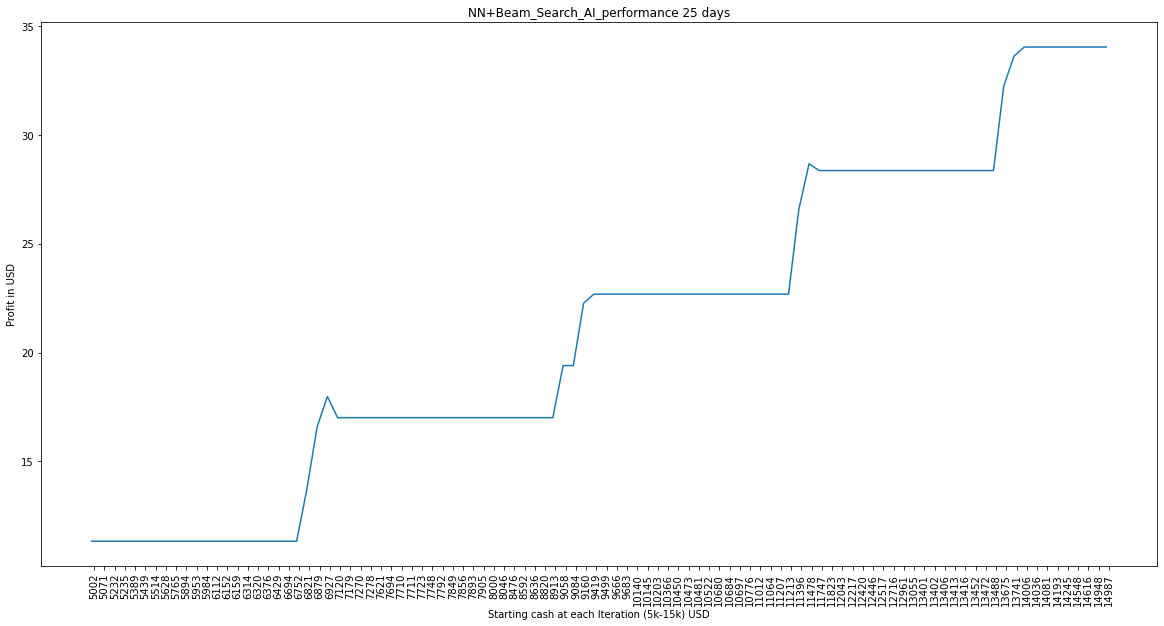

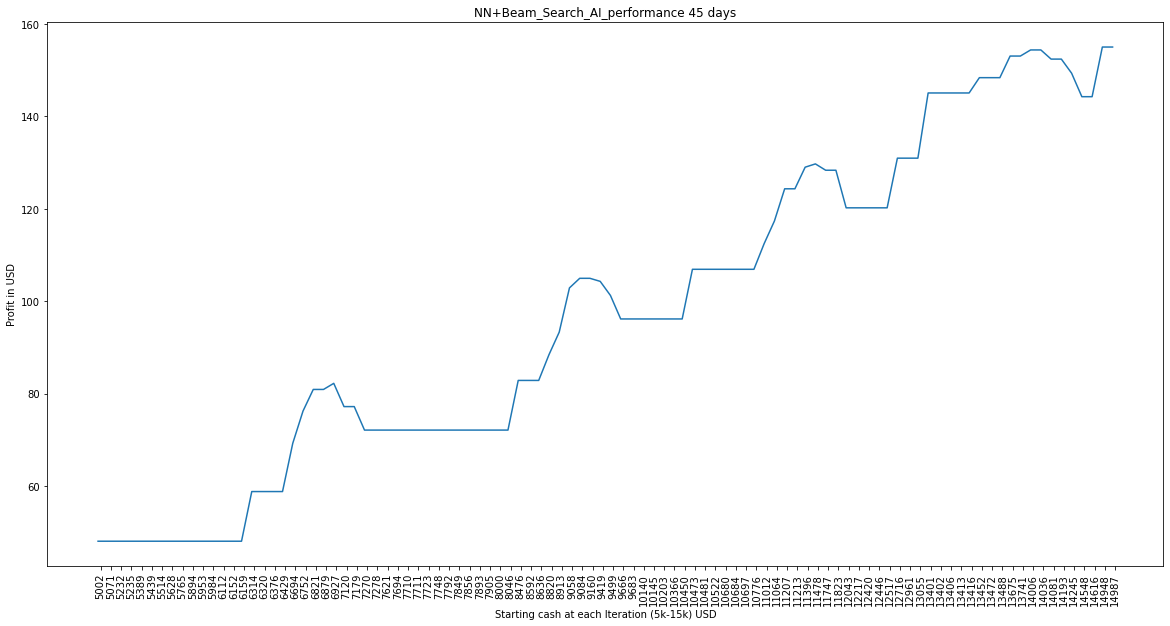

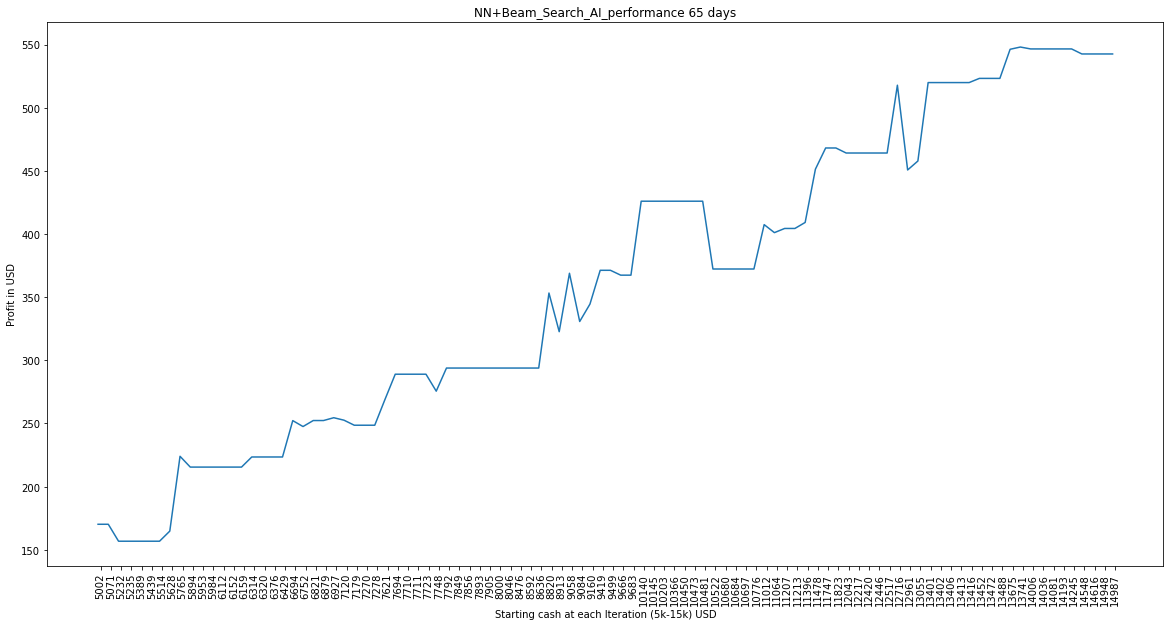

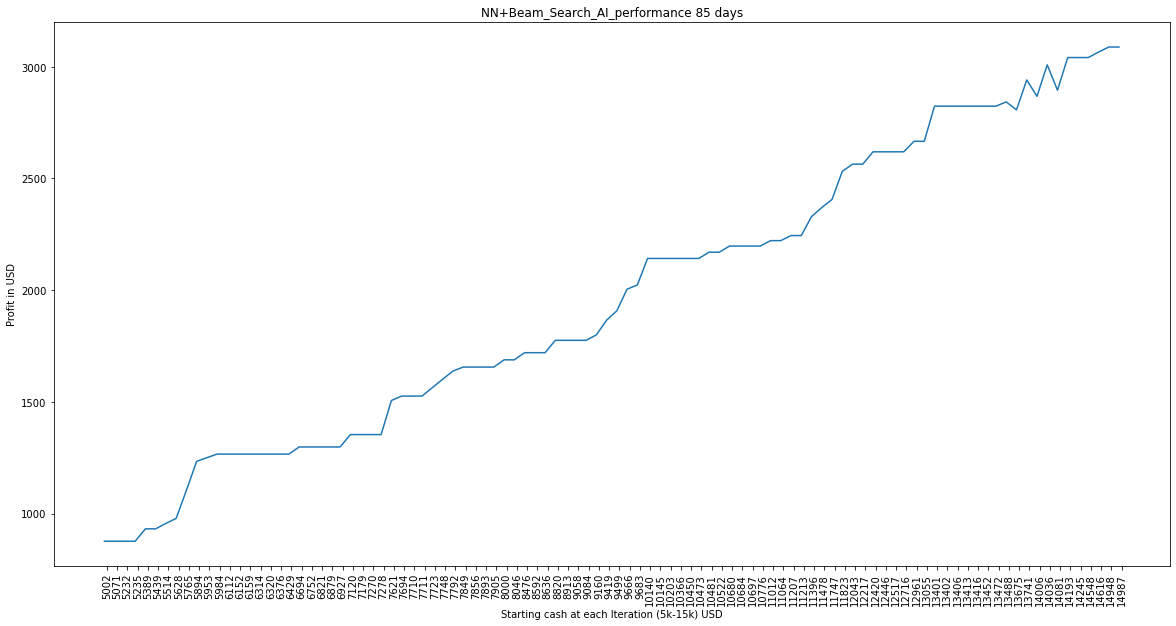

In [20]:
k = 5
    ## Graphs for beam search performance
for size_result in game_len_results:
    #print("Game size = ",k,"Profit/ Loss for 100 iterations in NN + beam search AI:",size_result)
    N = len(size_result)
    ind = np.arange(N) 
    width = 0.5       
        #plt.bar(ind, size_result, width)
    plt.figure(figsize = (20,10))
    plt.plot(ind, size_result)

    plt.ylabel('Profit in USD')
    plt.title('NN+Beam_Search_AI_performance %02d days'%(k))
    plt.xlabel('Starting cash at each Iteration (5k-15k) USD')
    plt.xticks(ind + width / 2, random_cash_list, rotation = 'vertical')
    #plt.legend(loc='best')
    plt.savefig('NN_Beam_Per%02d.png'%(k),dpi=300, bbox_inches='tight')
    k+=20
    plt.show()

In [129]:
print(actionsListPredicted)

[['h', 'h', 'h', 'h', 'h'], ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'], ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'], ['h', 'h', 'h', 'h', 'h', 'h', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'], ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 